### Importing relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score

from sklearn.metrics import average_precision_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import re
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression



### Importing Dataset

In [2]:
data=pd.read_csv("data/data_files/train.csv")

### Exploratory Data Analysis

In [3]:
#importing the data dictionary/description file
description=pd.read_csv("data/data_files/data_dictionary.csv")

In [4]:
description.iloc[0:40,:-1]

,Unnamed: 0,Variable Name,Description
0,0,UniqueID,Identifier for customers
1,1,loan_default,Payment default in the first EMI on due date
2,2,disbursed_amount,Amount of Loan disbursed
3,3,asset_cost,Cost of the Asset
4,4,ltv,Loan to Value of the asset
5,5,branch_id,Branch where the loan was disbursed
6,6,supplier_id,Vehicle Dealer where the loan was disbursed
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)"
8,8,Current_pincode,Current pincode of the customer
9,9,Date.of.Birth,Date of birth of the customer


In [5]:
data.shape

(233154, 41)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
UniqueID,233154.0,535917.573376,6.831569e+04,417428.00,476786.25,535978.5,595039.75,6.710840e+05
disbursed_amount,233154.0,54356.993528,1.297131e+04,13320.00,47145.00,53803.0,60413.00,9.905720e+05
asset_cost,233154.0,75865.068144,1.894478e+04,37000.00,65717.00,70946.0,79201.75,1.628992e+06
ltv,233154.0,74.746530,1.145664e+01,10.03,68.88,76.8,83.67,9.500000e+01
branch_id,233154.0,72.936094,6.983499e+01,1.00,14.00,61.0,130.00,2.610000e+02
supplier_id,233154.0,19638.635035,3.491950e+03,10524.00,16535.00,20333.0,23000.00,2.480300e+04
manufacturer_id,233154.0,69.028054,2.214130e+01,45.00,48.00,86.0,86.00,1.560000e+02
Current_pincode_ID,233154.0,3396.880247,2.238148e+03,1.00,1511.00,2970.0,5677.00,7.345000e+03
State_ID,233154.0,7.262243,4.482230e+00,1.00,4.00,6.0,10.00,2.200000e+01
Employee_code_ID,233154.0,1549.477148,9.752613e+02,1.00,713.00,1451.0,2362.00,3.795000e+03


In [8]:
data.isna().sum()
#observed null values in the "Employment type" column

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [9]:
#high dimensional data which are to be dropped
data.nunique()

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

### Feature engineering: Branch-level risk encoding (Amount-weighted FPD)

Since default is defined at the **first EMI**, we use **First Payment Default (FPD)** instead of NPA.
For each branch \(b\), we compute an amount-weighted FPD ratio.

$$
\text{Smoothed FPD}_b
=
\frac{D_b + \alpha \mu}{T_b + \alpha}\times 100
$$
where
- Db  = total defaulted disbursed amount in branch b
- Tb  = total disbursed amount in branch b
- μ = overall (training) amount-weighted default ratio
- α = median(Tb) (training only)


Branches are then label encoded into 3 categories using **training percentiles**:
* High risk (top 33%): 2
* Medium risk (33%–66%): 1
* Low risk (bottom 33%): 0


In [10]:
mu = data["loan_default"].mean()
alpha = 100

branch = (
    data.groupby("branch_id")["loan_default"]
    .agg(total_loans="count", fpd_count="sum")
    .reset_index()
)

branch["fpd_rate_raw"] = branch["fpd_count"] / branch["total_loans"] * 100
branch["fpd_rate_smoothed"] = (
    (branch["fpd_count"] + alpha * mu) /
    (branch["total_loans"] + alpha) * 100
)

q1, q2 = branch["fpd_rate_smoothed"].quantile([0.33, 0.66])

branch["branch_fpd_risk_bucket"] = pd.cut(
    branch["fpd_rate_smoothed"],
    bins=[-np.inf, q1, q2, np.inf],
    labels=[0, 1, 2]
).astype(int)

branch_sorted = branch.sort_values("fpd_rate_smoothed", ascending=False)

print(pd.DataFrame(branch_sorted))


    branch_id  total_loans  fpd_count  fpd_rate_raw  fpd_rate_smoothed  \
74        251         3844       1322     34.391259          34.069653   
75        254         1699        551     32.430842          31.834748   
20         36         8832       2621     29.676178          29.586958   
44         97          389        122     31.362468          29.387957   
39         78         2182        636     29.147571          28.821521   
..        ...          ...        ...           ...                ...   
15         19         5860        933     15.921502          16.018576   
13         17         1160        171     14.741379          15.294215   
0           1         5709        853     14.941321          15.057792   
5           8         3146        431     13.699936          13.946615   
61        152         4933        658     13.338739          13.505009   

    branch_fpd_risk_bucket  
74                       2  
75                       2  
20                      

### Feature engineering: CNS description transformation (default-rate replacement)

`PERFORM_CNS.SCORE.DESCRIPTION` contains multiple categorical values such as *Very Low Risk*, *High Risk*, and several *Not Scored / No Bureau History* groups. Since these groups have different default behaviour, the column is converted into a numeric risk feature by replacing each category with its **average default rate** computed on the training data.

For each CNS description category `c`:

`CNS_DefaultRate(c) = (sum of y_i for all loans with x_i = c) / N_c`

where:
- `y_i ∈ {0,1}` is the target (`loan_default`)
- `N_c` is the number of loans belonging to category `c`


During preprocessing:
1. The mapping `CNS_DefaultRate(c)` is computed using **training data only** (to avoid leakage).
2. Each row’s CNS description is replaced with its mapped default rate value (new column: `cns_desc_default_rate`).
3. Any unseen CNS categories in the test set are assigned the overall training default rate.
4. The original `PERFORM_CNS.SCORE.DESCRIPTION` column is dropped.


In [11]:
data["PERFORM_CNS.SCORE.DESCRIPTION"].value_counts()

PERFORM_CNS.SCORE.DESCRIPTION
No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the c

In [12]:
cns_col = "PERFORM_CNS.SCORE.DESCRIPTION"

cns_default_map = (
    data.groupby(cns_col)["loan_default"]
    .mean()
    .reset_index(name="cns_desc_avg_default_rate")
    .sort_values("cns_desc_avg_default_rate", ascending=False)
)

print(cns_default_map)


                        PERFORM_CNS.SCORE.DESCRIPTION  \
12                                   M-Very High Risk   
11                                   L-Very High Risk   
10                                        K-High Risk   
8                                       I-Medium Risk   
19       Not Scored: Sufficient History Not Available   
9                                         J-High Risk   
7                                       H-Medium Risk   
13                        No Bureau History Available   
18                       Not Scored: Only a Guarantor   
17  Not Scored: Not Enough Info available on the c...   
6                                          G-Low Risk   
16  Not Scored: No Updates available in last 36 mo...   
5                                          F-Low Risk   
15  Not Scored: No Activity seen on the customer (...   
2                                     C-Very Low Risk   
4                                          E-Low Risk   
0                              

## Preprocessing summary

### Column removal
The following high-cardinality / low-value columns are removed:
1. UniqueID
2. supplier_id
3. manufacturer_id
4. Current_pincode_ID
5. Date.of.Birth
6. DisbursalDate
7. State_ID
8. Employee_code_ID
9. MobileNo_Avl_Flag

### CNS score description transformation
`PERFORM_CNS.SCORE.DESCRIPTION` is converted into a numeric risk feature by replacing each category with its **average default rate** (computed on training data only).
This value is stored as `cns_desc_default_rate`, and the original description column is dropped.

### Categorical encoding
`Employment.Type` missing values are filled with `"Unemployed"` and then one-hot encoded (train/test columns aligned).

### PRI + SEC consolidation
For bureau PRI/SEC feature pairs (accounts, balances, sanctioned/disbursed amounts, instalment):
- create `*_TOTAL = PRI + SEC`
- create `*_PRI_SEC_RATIO = PRI / (SEC + ε)`
Original PRI/SEC columns are dropped.

### Outlier handling
Outliers are treated using **leakage-proof IQR clipping** (bounds computed on train, applied to both train and test) for columns with a huge right tail:
- ACTIVE_ACCTS_TOTAL, NO_OF_ACCTS_TOTAL, OVERDUE_ACCTS_TOTAL, CURRENT_BALANCE_TOTAL

### Numeric conversions
`AVERAGE.ACCT.AGE` and `CREDIT.HISTORY.LENGTH` are converted from `Xyrs Ymon` format to total months.

### Branch risk feature
Branch-level risk is computed using **amount-weighted smoothed FPD**, producing:
- `fpd_amount_ratio_smoothed`
- `branch_risk_level` (3 percentile-based buckets)



In [13]:
#Defining thr preprocess function to carry out all tasks mentioned above and generate the Test and Train split

def preprocess_and_split(data, test_size=0.2, random_state=42):

    columns_to_remove = [
        "UniqueID",
        "supplier_id",
        "manufacturer_id",
        "Current_pincode_ID",
        "Date.of.Birth",
        "DisbursalDate",
        "State_ID",
        "Employee_code_ID",
        "MobileNo_Avl_Flag"
    ]

    columns_to_transform = [
        "AVERAGE.ACCT.AGE",
        "CREDIT.HISTORY.LENGTH"
    ]

    # Train-test split after stratifying to maintain original class  imbalance in test and train splits

    train_df, test_df = train_test_split(
        data,
        test_size=test_size,
        stratify=data["loan_default"],
        random_state=random_state
    )

    y_train = train_df["loan_default"].copy()
    y_test = test_df["loan_default"].copy()

    X_train = train_df.drop(columns=["loan_default"]).copy()
    X_test = test_df.drop(columns=["loan_default"]).copy()

    # Drop irrelevant columns
    X_train.drop(columns=columns_to_remove, inplace=True, errors="ignore")
    X_test.drop(columns=columns_to_remove, inplace=True, errors="ignore")

    # Combine PRI + SEC variables into TOTAL and PRI/SEC ratio (one ratio only)

    def add_pri_sec_features(df, eps=1e-6, drop_original=True):

        pairs = [
            ("PRI.NO.OF.ACCTS", "SEC.NO.OF.ACCTS", "NO_OF_ACCTS"),
            ("PRI.ACTIVE.ACCTS", "SEC.ACTIVE.ACCTS", "ACTIVE_ACCTS"),
            ("PRI.OVERDUE.ACCTS", "SEC.OVERDUE.ACCTS", "OVERDUE_ACCTS"),
            ("PRI.CURRENT.BALANCE", "SEC.CURRENT.BALANCE", "CURRENT_BALANCE"),
            ("PRI.SANCTIONED.AMOUNT", "SEC.SANCTIONED.AMOUNT", "SANCTIONED_AMOUNT"),
            ("PRI.DISBURSED.AMOUNT", "SEC.DISBURSED.AMOUNT", "DISBURSED_AMOUNT"),
            ("PRIMARY.INSTAL.AMT", "SEC.INSTAL.AMT", "INSTAL_AMT"),
        ]

        cols_to_drop = []

        for pri_col, sec_col, base in pairs:
            if pri_col in df.columns and sec_col in df.columns:
                pri = df[pri_col].fillna(0)
                sec = df[sec_col].fillna(0)

                df[f"{base}_TOTAL"] = pri + sec
                df[f"{base}_PRI_SEC_RATIO"] = pri / (sec + eps) #eps added to accommodate the ratio if sec aprox. 0

                cols_to_drop.extend([pri_col, sec_col])

        if drop_original and cols_to_drop:
            df.drop(columns=cols_to_drop, inplace=True, errors="ignore")

        return df

    X_train = add_pri_sec_features(X_train, drop_original=True)
    X_test = add_pri_sec_features(X_test, drop_original=True)

    # Leakage-proof outlier treatment (IQR clipping based on TRAIN ONLY)

    def iqr_clip_train_only(X_train, X_test, cols, factor=1.5):
        for col in cols:
            if col not in X_train.columns or col not in X_test.columns:
                continue

            Q1 = X_train[col].quantile(0.25) #limits defined using the train split only
            Q3 = X_train[col].quantile(0.75)
            IQR = Q3 - Q1

            lower = Q1 - factor * IQR
            upper = Q3 + factor * IQR

            X_train[col] = X_train[col].clip(lower, upper)
            X_test[col] = X_test[col].clip(lower, upper)

        return X_train, X_test

    outlier_cols = [
        "ACTIVE_ACCTS_TOTAL",
        "NO_OF_ACCTS_TOTAL",
        "OVERDUE_ACCTS_TOTAL",
        "CURRENT_BALANCE_TOTAL"
    ]

    X_train, X_test = iqr_clip_train_only(X_train, X_test, outlier_cols, factor=1.5)

    # CNS description default-rate replacement (TRAIN ONLY)

    cns_col = "PERFORM_CNS.SCORE.DESCRIPTION"
    if cns_col in X_train.columns and cns_col in X_test.columns:

        X_train[cns_col] = X_train[cns_col].fillna("Missing_CNS_Desc")
        X_test[cns_col] = X_test[cns_col].fillna("Missing_CNS_Desc")

        cns_default_map = (
            pd.concat([X_train[[cns_col]], y_train], axis=1)
            .groupby(cns_col)["loan_default"]
            .mean()
            .reset_index(name="cns_desc_default_rate")
        )

        X_train = X_train.merge(cns_default_map, on=cns_col, how="left")
        X_test = X_test.merge(cns_default_map, on=cns_col, how="left")

        global_default_rate = float(y_train.mean())
        X_test["cns_desc_default_rate"] = X_test["cns_desc_default_rate"].fillna(global_default_rate)

        X_train.drop(columns=[cns_col], inplace=True, errors="ignore")
        X_test.drop(columns=[cns_col], inplace=True, errors="ignore")

    # Fill missing Employment.Type
    X_train["Employment.Type"] = X_train["Employment.Type"].fillna("Unemployed")
    X_test["Employment.Type"] = X_test["Employment.Type"].fillna("Unemployed")

    # Transform age-related columns -> total months
    for col in columns_to_transform:
        for df in [X_train, X_test]:
            yrs = (
                df[col].astype(str)
                .str.extract(r"(\d+)(?=yrs)")[0]
                .astype(float)
                .fillna(0)
            )

            mon = (
                df[col].astype(str)
                .str.extract(r"(\d+)(?=mon)")[0]
                .astype(float)
                .fillna(0)
            )

            df[col + "_months"] = 12 * yrs + mon
            df.drop(columns=col, inplace=True, errors="ignore")

    # One-hot encode Employment.Type

    train_dummies = pd.get_dummies(X_train["Employment.Type"], drop_first=True).astype(int)
    test_dummies = pd.get_dummies(X_test["Employment.Type"], drop_first=True).astype(int)

    test_dummies = test_dummies.reindex(columns=train_dummies.columns, fill_value=0)

    X_train = pd.concat([X_train.drop(columns=["Employment.Type"]), train_dummies], axis=1)
    X_test = pd.concat([X_test.drop(columns=["Employment.Type"]), test_dummies], axis=1)

    # Branch amount-weighted FPD risk encoding (TRAIN ONLY)

    amount_col = "disbursed_amount"

    train_tmp = train_df[["branch_id", "loan_default", amount_col]].copy()
    train_tmp["default_amount"] = np.where(train_tmp["loan_default"] == 1, train_tmp[amount_col], 0)

    branch_stats = (
        train_tmp.groupby("branch_id")
        .agg(
            total_amount=(amount_col, "sum"),
            default_amount=("default_amount", "sum")
        )
        .reset_index()
    )

    mu = train_tmp["default_amount"].sum() / train_tmp[amount_col].sum()
    if pd.isna(mu) or np.isinf(mu):
        mu = 0.0

    alpha = float(branch_stats["total_amount"].median())
    if pd.isna(alpha) or alpha <= 0:
        alpha = 1.0

    branch_stats["fpd_amount_ratio_smoothed"] = (
        (branch_stats["default_amount"] + alpha * mu) /
        (branch_stats["total_amount"] + alpha) * 100
    ).replace([np.inf, -np.inf], np.nan).fillna(0)

    q1, q2 = branch_stats["fpd_amount_ratio_smoothed"].quantile([0.33, 0.66])

    branch_stats["branch_risk_level"] = pd.cut(
        branch_stats["fpd_amount_ratio_smoothed"],
        bins=[-np.inf, q1, q2, np.inf],
        labels=[0, 1, 2]
    ).astype(int)

    X_train = X_train.merge(
        branch_stats[["branch_id", "fpd_amount_ratio_smoothed", "branch_risk_level"]],
        on="branch_id",
        how="left"
    )

    X_test = X_test.merge(
        branch_stats[["branch_id", "fpd_amount_ratio_smoothed", "branch_risk_level"]],
        on="branch_id",
        how="left"
    )

    fallback_risk = int(branch_stats["branch_risk_level"].mode()[0])
    fallback_smoothed = float(branch_stats["fpd_amount_ratio_smoothed"].median())

    X_test["branch_risk_level"] = X_test["branch_risk_level"].fillna(fallback_risk)
    X_test["fpd_amount_ratio_smoothed"] = X_test["fpd_amount_ratio_smoothed"].fillna(fallback_smoothed)

    X_train.drop(columns=["branch_id"], inplace=True, errors="ignore")
    X_test.drop(columns=["branch_id"], inplace=True, errors="ignore")

    # Ensure identical columns order between train and test

    X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

    return X_train, y_train, X_test, y_test


In [14]:
#Creating test train splits
X_train, y_train, X_test, y_test=preprocess_and_split(data)

### Class Imbalance Assessment

The target variable (`loan_default`) exhibits a moderate class imbalance, with approximately **21.7% defaults** and **78.3% non-defaults**. While the minority class is underrepresented, the imbalance is not extreme. Therefore model performance is evaluated using **Precision–Recall AUC (PR-AUC)**.


In [15]:
# Baseline PR-AUC
data["loan_default"].value_counts(normalize=True) * 100


loan_default
0    78.292888
1    21.707112
Name: proportion, dtype: float64

In [16]:
#Checking if the imbalance is preseved across the test and train
print("Overall:")
print(data["loan_default"].value_counts(normalize=True) * 100)

print("\nTrain:")
print(y_train.value_counts(normalize=True) * 100)

print("\nTest:")
print(y_test.value_counts(normalize=True) * 100)


Overall:
loan_default
0    78.292888
1    21.707112
Name: proportion, dtype: float64

Train:
loan_default
0    78.292757
1    21.707243
Name: proportion, dtype: float64

Test:
loan_default
0    78.29341
1    21.70659
Name: proportion, dtype: float64


In [17]:
#computing PR-AUC For the baseline

from sklearn.metrics import (
    precision_score, recall_score, f1_score,
    accuracy_score, confusion_matrix,
    roc_auc_score, average_precision_score
)

y_pred_baseline = np.zeros_like(y_test)
y_proba_baseline = np.zeros(len(y_test))   # always predicts probability 0 for class 1

print("Baseline (predict all 0)")
print("Accuracy :", accuracy_score(y_test, y_pred_baseline))
print("Precision:", precision_score(y_test, y_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_test, y_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_test, y_pred_baseline, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_proba_baseline))
print("PR-AUC   :", average_precision_score(y_test, y_proba_baseline))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_baseline))


Baseline (predict all 0)
Accuracy : 0.7829340996332912
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5
PR-AUC   : 0.21706590036670884

Confusion Matrix:
 [[36509     0]
 [10122     0]]



### MODELS:

#### 1. 1.LOGISTIC REGRESSION

In [18]:
#scaling data in order to avoid slower convergence , class weight kept at balanced to accommodate the imbalance and penalize misclassifying the minority class more.

pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        solver="lbfgs"
    ))
])
pipe.fit(X_train,y_train) #fitting train data


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('logit', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [19]:
y_pred = pipe.predict(X_test)
y_proba = pipe.predict_proba(X_test)[:, 1]  # probability of positive class
from sklearn.metrics import  precision_score, recall_score, f1_score

print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))



Precision: 0.295260685125211
Recall   : 0.6394981229006125
F1-score : 0.4039943828990482


In [20]:
y_proba = pipe.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.3180131671799189


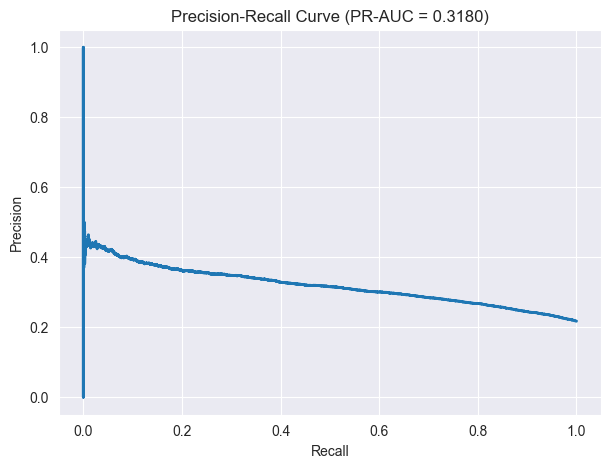

In [21]:

# y_true = true labels (0/1)
# y_proba = predicted probabilities from model (for class 1)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (PR-AUC = {pr_auc:.4f})")
plt.grid(True)
plt.show()


In [22]:
results=[]
results.append({
        "Model": "Logistic regression",
        "F1-score": f1_score(y_test, y_pred),
    "PR-AUC": average_precision_score(y_test, y_proba)
    })


### 2.Logistic Regression with elastinet

In [23]:

pipe_enet = Pipeline([
    ("scaler", StandardScaler()),
    ("logit", LogisticRegression(
        penalty="elasticnet",
        solver="saga",          # REQUIRED
        l1_ratio=0.5,           # 0 = L2, 1 = L1
        C=1.0,                  # inverse regularization strength
        class_weight="balanced",
        max_iter=5000,
        random_state=42
    ))
])

pipe_enet.fit(X_train, y_train)


,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('scaler', ...), ('logit', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"copy copy: bool, default=TrueIf False, try to avoid a copy and do inplace scaling instead.This is not guaranteed to always work inplace; e.g. if the data isnot a NumPy array or scipy.sparse CSR matrix, a copy may still bereturned.",True
,"with_mean with_mean: bool, default=TrueIf True, center the data before scaling.This does not work (and will raise an exception) when attempted onsparse matrices, because centering them entails building a densematrix which in common use cases is likely to be too large to fit inmemory.",True
,"with_std with_std: bool, default=TrueIf True, scale the data to unit variance (or equivalently,unit standard deviation).",True
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'elasticnet'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not wo

In [24]:
y_pred = pipe_enet.predict(X_test)
y_proba = pipe_enet.predict_proba(X_test)[:, 1]  # probability of positive class


In [25]:


print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-score :", f1_score(y_test, y_pred))

Precision: 0.29530936302244937
Recall   : 0.6393993281960086
F1-score : 0.4040202259816468


In [26]:
y_proba = pipe_enet.predict_proba(X_test)[:,1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.3180099299979139


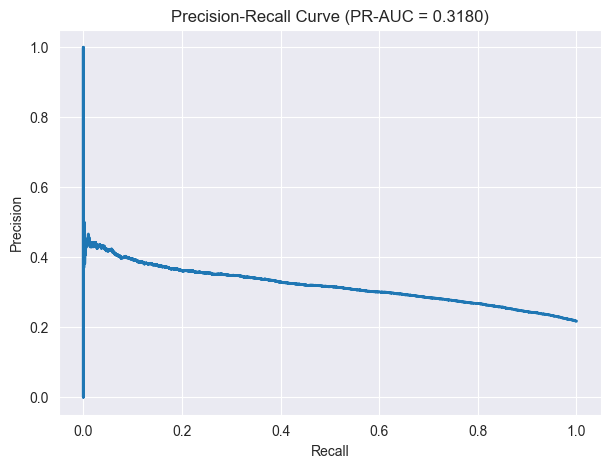

In [27]:
# y_true = true labels (0/1)
# y_proba = predicted probabilities from model (for class 1)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (PR-AUC = {pr_auc:.4f})")
plt.grid(True)
plt.show()


In [28]:

results.append({
        "Model": "Logreg(elastinet)",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

### 3.Descision Tree


In [29]:

dt = DecisionTreeClassifier(
    max_depth=5,
    min_samples_leaf=50,
    class_weight="balanced",
    random_state=42
)

dt.fit(X_train, y_train)


,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",50
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",42
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current n

In [30]:

y_pred_dt = dt.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall   :", recall_score(y_test, y_pred_dt))
print("F1-score :", f1_score(y_test, y_pred_dt))



Precision: 0.2844436121904405
Recall   : 0.6002766251728907
F1-score : 0.38598608772988596


In [31]:
y_proba = dt.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.2948914563072743


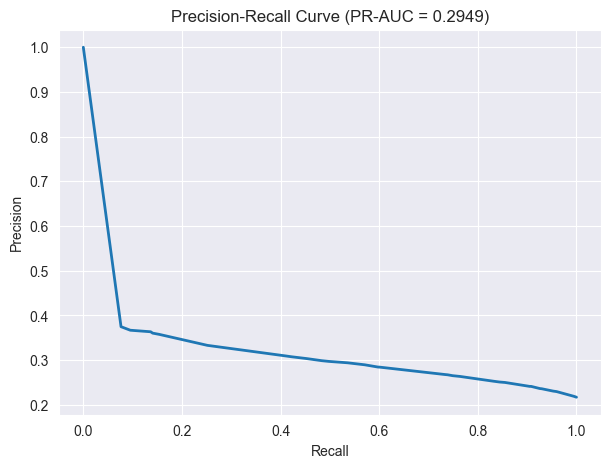

In [32]:

# y_true = true labels (0/1)
# y_proba = predicted probabilities from model (for class 1)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (PR-AUC = {pr_auc:.4f})")
plt.grid(True)
plt.show()


In [33]:
results.append({
        "Model": "Decision Tree ",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

### 4.Random Forest

In [34]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=8,
    min_samples_leaf=30,
    class_weight="balanced",
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",300
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",8
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",30
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

In [35]:
y_pred_rf = rf.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall   :", recall_score(y_test, y_pred_rf))
print("F1-score :", f1_score(y_test, y_pred_rf))



Precision: 0.29454859847105935
Recall   : 0.6394981229006125
F1-score : 0.4033273101127796


In [36]:
y_proba = rf.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.3248213519409745


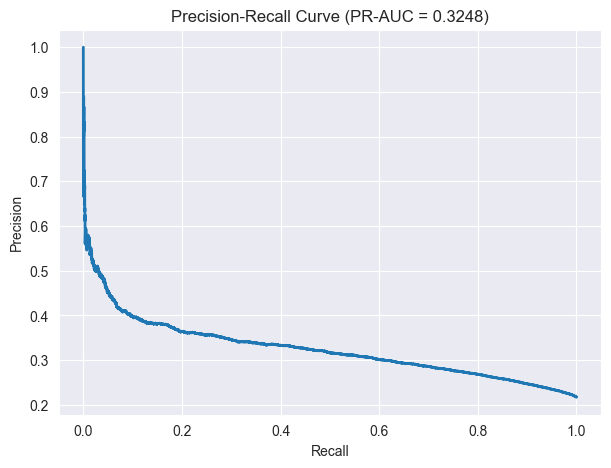

In [37]:
# y_true = true labels (0/1)
# y_proba = predicted probabilities from model (for class 1)

precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (PR-AUC = {pr_auc:.4f})")
plt.grid(True)
plt.show()


In [38]:
results.append({
        "Model": "Random Forest",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

In [39]:
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

rf_importance.head(10)


ltv                            0.148269
disbursed_amount               0.121219
fpd_amount_ratio_smoothed      0.116128
cns_desc_default_rate          0.084364
branch_risk_level              0.083200
PERFORM_CNS.SCORE              0.080351
asset_cost                     0.031868
SANCTIONED_AMOUNT_TOTAL        0.031391
DISBURSED_AMOUNT_TOTAL         0.027461
OVERDUE_ACCTS_PRI_SEC_RATIO    0.025284
dtype: float64

### 5.XG Boost

In [40]:
from xgboost import XGBClassifier
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()


xgb = XGBClassifier(
    n_estimators=500,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_weight,
    eval_metric="logloss",
    random_state=42
)

xgb.fit(X_train, y_train)


,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.8
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

In [44]:
y_pred_xgb = xgb.predict(X_test)

print("Precision:", precision_score(y_test, y_pred_xgb))
print("Recall   :", recall_score(y_test, y_pred_xgb))
print("F1-score :", f1_score(y_test, y_pred_xgb))
print("accuracy:",accuracy_score(y_test, y_pred_xgb))



Precision: 0.298665335028146
Recall   : 0.6499703615886189
F1-score : 0.4092690513219285
accuracy: 0.5927172910724625


In [42]:
y_proba = xgb.predict_proba(X_test)[:, 1]
pr_auc = average_precision_score(y_test, y_proba)

print("PR-AUC:", pr_auc)


PR-AUC: 0.33238044758690954


In [45]:
# Gain-based feature importance
importance_gain = xgb.get_booster().get_score(importance_type="gain")

imp_df = (
    pd.DataFrame(importance_gain.items(), columns=["feature", "importance"])
    .sort_values("importance", ascending=False)
)

print(imp_df.head(30))


                                feature  importance
31                    branch_risk_level  138.868225
25                cns_desc_default_rate  109.462227
30            fpd_amount_ratio_smoothed   77.221878
2                                   ltv   71.688530
11                      NO.OF_INQUIRIES   60.907608
28                        Self employed   56.273571
19              SANCTIONED_AMOUNT_TOTAL   53.439903
0                      disbursed_amount   50.308071
16          OVERDUE_ACCTS_PRI_SEC_RATIO   41.656918
10  DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS   41.555962
8                     PERFORM_CNS.SCORE   37.147240
12                    NO_OF_ACCTS_TOTAL   36.227356
5                          VoterID_flag   34.180809
21               DISBURSED_AMOUNT_TOTAL   29.375162
27         CREDIT.HISTORY.LENGTH_months   26.870934
20      SANCTIONED_AMOUNT_PRI_SEC_RATIO   24.020874
3                           Aadhar_flag   22.559086
24             INSTAL_AMT_PRI_SEC_RATIO   21.422340
13          

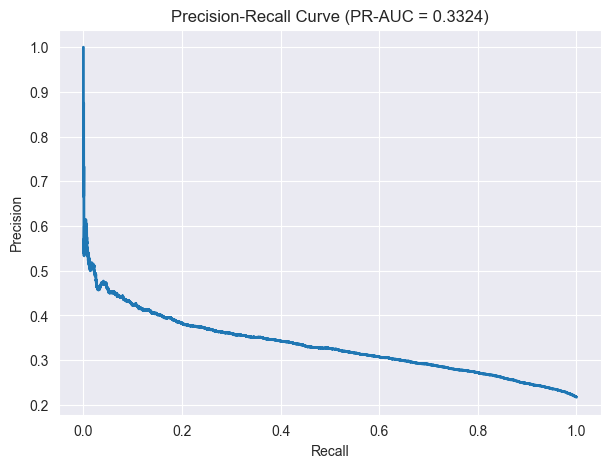

In [44]:
# y_true = true labels (0/1)
# y_proba = predicted probabilities from model (for class 1)
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

pr_auc = average_precision_score(y_test, y_proba)

plt.figure(figsize=(7,5))
plt.plot(recall, precision, linewidth=2)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title(f"Precision-Recall Curve (PR-AUC = {pr_auc:.4f})")
plt.grid(True)
plt.show()


In [45]:
results.append({
        "Model": "XGBoost",
        "F1-score": f1_score(y_test, y_pred),
        "PR-AUC": average_precision_score(y_test, y_proba)
    })

In [46]:
print(results)

[{'Model': 'Logistic regression', 'F1-score': 0.4039943828990482, 'PR-AUC': 0.3180131671799189}, {'Model': 'Logreg(elastinet)', 'F1-score': 0.4040202259816468, 'PR-AUC': 0.3180099299979139}, {'Model': 'Decision Tree ', 'F1-score': 0.4040202259816468, 'PR-AUC': 0.2948914563072743}, {'Model': 'Random Forest', 'F1-score': 0.4040202259816468, 'PR-AUC': 0.3248213519409745}, {'Model': 'XGBoost', 'F1-score': 0.4040202259816468, 'PR-AUC': 0.33238044758690954}]


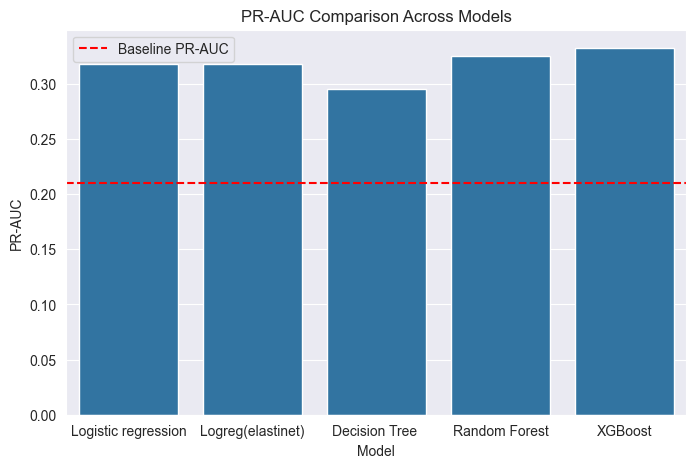

In [47]:
results_df = pd.DataFrame(results)

plt.figure(figsize=(8, 5))
sns.barplot(
    data=results_df,
    x="Model",
    y="PR-AUC"
)
plt.axhline(0.21, color="red", linestyle="--", label="Baseline PR-AUC")
plt.title("PR-AUC Comparison Across Models")
plt.ylabel("PR-AUC")
plt.legend()
plt.show()


### SUMMARY

The baseline PR-AUC equals the default rate (0.21). Our XGBoost model achieves a PR-AUC of 0.3323, representing a ~50% improvement over random ranking, indicating strong performance in identifying defaulters despite modest overall accuracy.
Although overall accuracy is similar across models, XGBoost consistently outperforms Logistic Regression and Random Forest in PR-AUC and F1-score, indicating superior ranking and classification performance for defaulters in an imbalanced setting. Hence, XGBoost was selected as the final model.